### Pymaceuticals Inc.   Summary by Katherine Layton

### Summary of the results from a study to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against other treatment regimens for squamous cell carcinoma (SCC).

#### Capomulin and Ramicane both show a marked decrease in tumor volume over this 45 day study. 
Tumor Volume (mm3) measurements are lower for both mean and median, variance is low (tight). low standard deviation shows less variability in the data and the standard error of the mean shows more precision (than variability).

Here are the results of Mean, Median, Variance, St.Deviation and SEM calculations:
Capomulin	40.675741	41.557809	24.947764	4.994774	0.329346
Ramicane	40.216745	40.673236	23.486704	4.846308	0.320955

#### Summary statistics also show Capomulin and Ramicane to be the most effective treatments for SCC.
The quartiles (Q1 and Q3) provide information about the spread of the data and where the middle 50% of the measurements fall.The IQR indicates the range within which the majority of measurements lie.The lower and upper bounds help identify potential outliers. Any data points falling outside these bounds are considered potential outliers.
Potential outliers are specific data points that may be significantly different from the rest of the data.

Summary statistics for Capomulin:Lower Quartile: 32.37735684, Upper Quartile: 40.1592203, IQR: 7.781863460000004, 
Lower Bound: 20.70456164999999. Upper Bound: 51.83201549, Potential outliers: []

Summary statistics for Ramicane:Lower Quartile: 31.56046955, Upper Quartile: 40.65900627, IQR: 9.098536719999998, 
Lower Bound: 17.912664470000003, Upper Bound: 54.30681135. Potential outliers: []

#### Correlation results show tumor volume increases with mouse weight. Need to study more about obesity influence and side effects -including nausea, or lack of appetite.
The correlation between mouse weight and the average tumor volume is 0.84 (results using data with all Drug Regimens included). As this correlation is close to 1, there is a  strong tendency for the tumor volume to increase as the weight of the mouse increased. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

# Combine the data into a single DataFrame
cap_study=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
cap_study.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice
mouse_count = cap_study['Mouse ID'].value_counts()
len(mouse_count)

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
## Our data should be uniquely identified by Mouse ID and Timepoint
#find the duplicate mouse ID
cap_study['Mouse ID'].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice= cap_study.loc[cap_study['Mouse ID']== 'g989', :]
duplicate_mice

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_row = cap_study['Mouse ID'] == 'g989'
cap_study.drop(index = cap_study[remove_row].index, inplace=True)
#checking to see if removed
cap_study.loc[cap_study['Mouse ID']== 'g989', :]

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cap_study['Mouse ID'].value_counts()
len(mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tv_mean=cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tv_median=cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tv_var=cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tv_std=cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tv_sem=cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

print({"MeanTotalVolume" : [tv_mean], "MedianTotalVolume" : [tv_median], "TumorVolumeVariance" : [tv_var], "TumorVolume Std.Dev." : [tv_std], "TumorVolume Std.Err." : [tv_sem]})

{'MeanTotalVolume': [Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64], 'MedianTotalVolume': [Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64], 'TumorVolumeVariance': [Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64], 'TumorVolume Std.Dev.': [Drug Regimen
Capomulin    4.994774
Ceftamin     6.

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
sum_stats = cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_stats

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

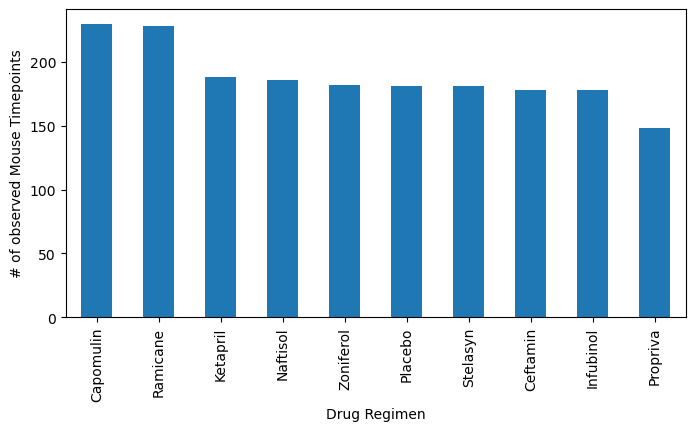

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_id_time = cap_study.groupby('Drug Regimen')['Timepoint'].count()
clean_id_time = clean_id_time.sort_values(ascending=False)
clean_id_time
clean_id_time.plot(kind='bar', figsize=(8,4), xlabel= 'Drug Regimen', ylabel='# of observed Mouse Timepoints')

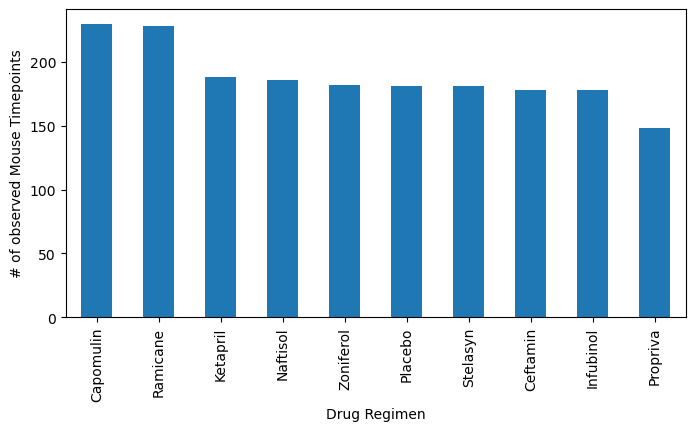

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot (matplotlib.
# Use DataFrame.plot() in order to create a bar chart of the data
clean_id_time.plot(kind="bar", figsize=(8,4))
plt.ylabel("# of observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

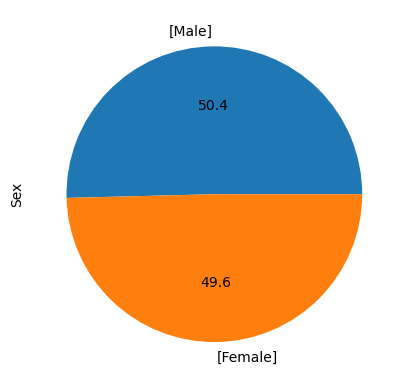

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
total_sex = cap_study.groupby('Mouse ID')['Sex'].unique()
countmf=total_sex.value_counts()  #male 125, female 123
countmf.plot(kind='pie', y='Sex', autopct='%1.1f')

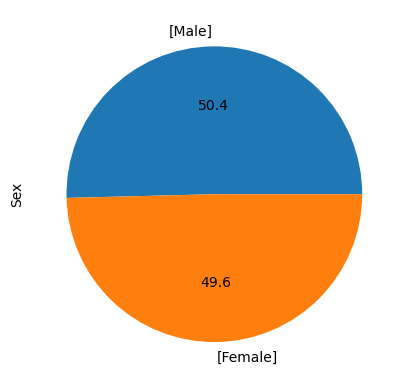

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
countmf.plot(kind="pie", autopct='%1.1f')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cap_study.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor

Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]

In [14]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cap_study,on=['Mouse ID','Timepoint'],how="left")
merged_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Add subset and convert to a list
    tumor_vol_data.append(treatment_data.tolist())    

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results
    print(f"Summary statistics for {treatment}:")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers.tolist()}\n")

Summary statistics for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential outliers: []

Summary statistics for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: []

Summary statistics for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: [36.3213458]

Summary statistics for Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: []



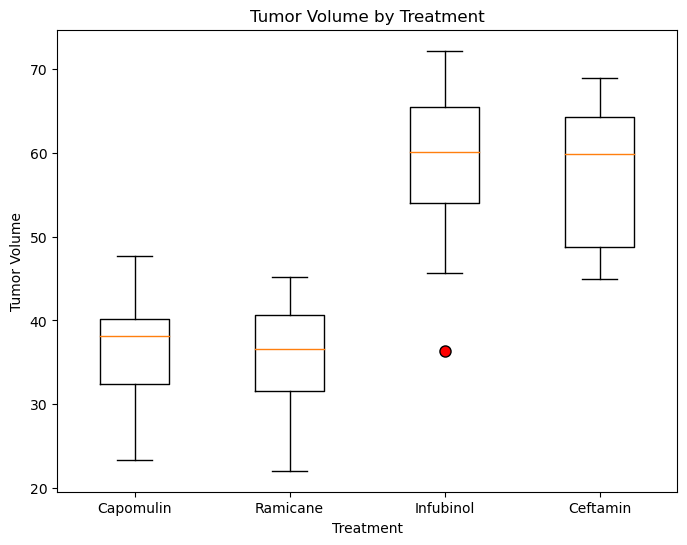

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
#dictionary for showing outlier with red color fill - to match answer in starter code
## Credit: Matplotlib (https://matplotlib.org/)
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.title('Tumor Volume by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

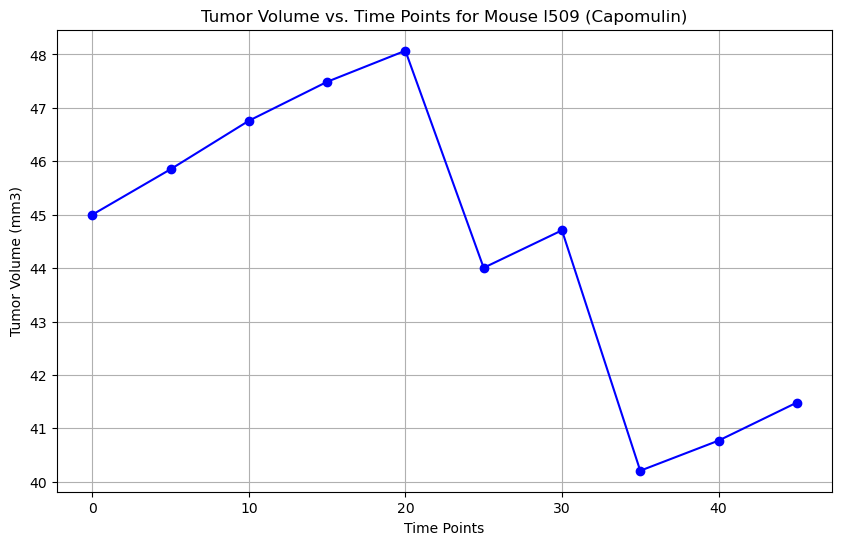

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse (use )
mouse_id = 'l509'
mouse_data = cap_study[cap_study['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f'Tumor Volume vs. Time Points for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

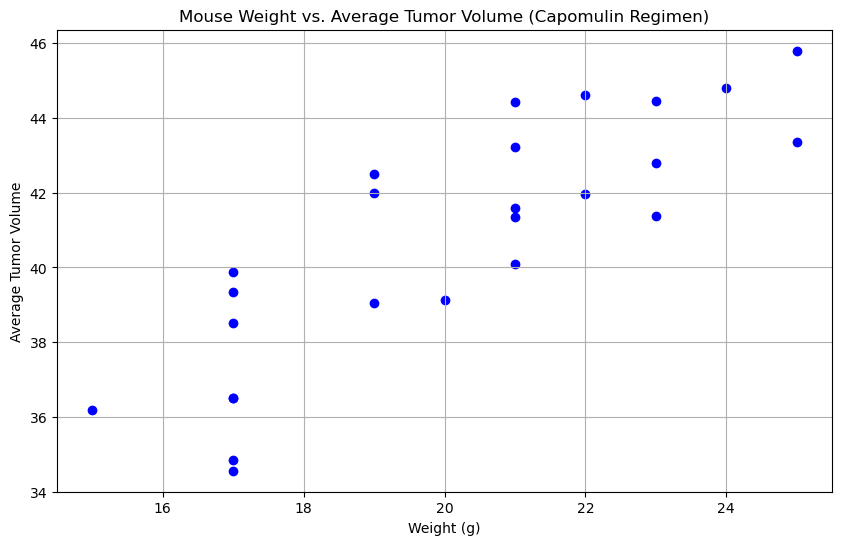

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed
#tumor volume for the entire Capomulin regimen
capomulin_data = cap_study[cap_study['Drug Regimen'] == 'Capomulin']

# Group the data by 'Mouse ID' and 'Weight' and calculate the average 'Tumor Volume (mm3)'
average_tumor_volume = capomulin_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
#rename for better reference to average column
average_tumor_volume.columns = ['Mouse ID', 'Weight (g)', 'Average Tumor Volume']
#print(average_tumor_volume.head()) #to check df

# Create the scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], 
            average_tumor_volume['Average Tumor Volume'], marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.grid(True)
plt.show()

## Correlation and Regression

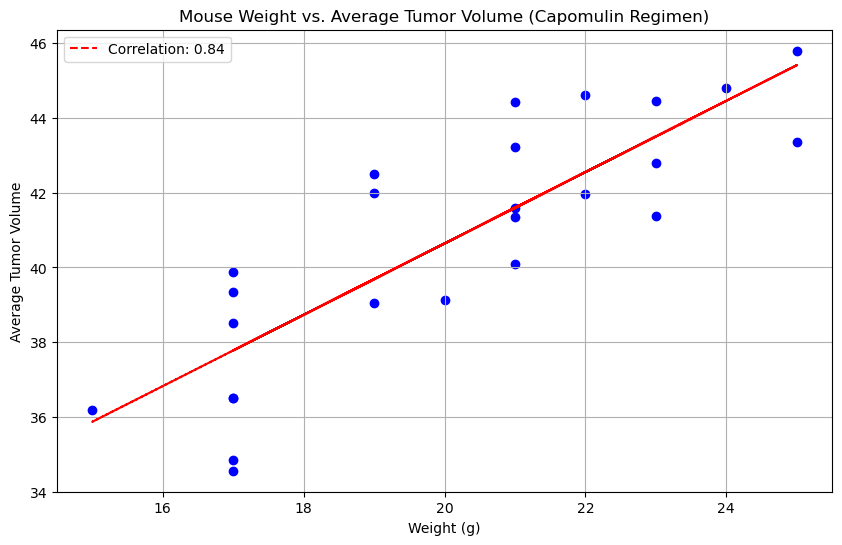

Correlation Coefficient: 0.84


In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Average Tumor Volume'])[0]

# Create a scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Average Tumor Volume'], marker='o', color='b')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.grid(True)

# Create a linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Average Tumor Volume'])

# Calculate the linear regression line
regress_line = slope * average_tumor_volume['Weight (g)'] + intercept

# Plot the linear regression line on the scatter plot
plt.plot(average_tumor_volume['Weight (g)'], regress_line, color='red', linestyle='--', label=f'Correlation: {correlation_coefficient:.2f}')
plt.legend()
plt.show()

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
